<a href="https://colab.research.google.com/github/JuanfeP2004/Examen3IoT/blob/main/Examen03IoTJuanFelipeRamirezCasta%C3%B1eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Examen 3 de IOT**
## **SIATA**
### Juan Felipe Ramírez Castañeda
### ID: 000166472
### 2025

##**Primer Punto: Obtención y preparación de los datos**

In [1]:
import pandas as pd
import requests as request

In [19]:
#Creamos la carpeta de assets para las imagenes
#https://github.com/JuanfeP2004/Examen3IoT/blob/main/AlertaRoja.png
#https://github.com/JuanfeP2004/Examen3IoT/blob/main/AlertaVerde.png

import os

# Nombre o ruta de la carpeta que quieres crear
carpeta = "assets"

# Crear la carpeta
os.mkdir(carpeta)

print("Carpeta creada con éxito:", carpeta)


Carpeta creada con éxito: assets


In [2]:
#Primero cargamos el JSON en un dataframe del PM25 del SIATA
customer_json_file ='https://siata.gov.co/EntregaData1/Datos_SIATA_Aire_AQ_pm25_Last.json'

response = request.get(customer_json_file)
data = response.json()

df = pd.json_normalize(data["measurements"])
df.head()

,city,sourceType,sourceName,country,value,mobile,location,parameter,unit,attribution.url,attribution.name,date.utc,date.local,averagingPeriod.units,averagingPeriod.value,coordinates.latitude,coordinates.longitude
0,Medellin,government,SIATA,Colombia,-9999.0,False,GIR-SOSN - _OFF-Girardota - S.O.S Aburrá Norte,pm25,ug/m3,https://siata.gov.co/,Sistema de Alerta Temprana de Medellín y el Va...,2024-09-04T13:00:00.000Z,2024-09-04T08:00:00.000-05:00,hours,1.0,6.378433,-75.451141
1,Medellin,government,SIATA,Colombia,-9999.0,False,GIR-SOSN - _OFF-Girardota - S.O.S Aburrá Norte,pm25,ug/m3,https://siata.gov.co/,Sistema de Alerta Temprana de Medellín y el Va...,2024-09-04T14:00:00.000Z,2024-09-04T09:00:00.000-05:00,hours,1.0,6.378433,-75.451141
2,Medellin,government,SIATA,Colombia,-9999.0,False,GIR-SOSN - _OFF-Girardota - S.O.S Aburrá Norte,pm25,ug/m3,https://siata.gov.co/,Sistema de Alerta Temprana de Medellín y el Va...,2024-09-04T15:00:00.000Z,2024-09-04T10:00:00.000-05:00,hours,1.0,6.378433,-75.451141
3,Medellin,government,SIATA,Colombia,-9999.0,False,GIR-SOSN - _OFF-Girardota - S.O.S Aburrá Norte,pm25,ug/m3,https://siata.gov.co/,Sistema de Alerta Temprana de Medellín y el Va...,2024-09-04T16:00:00.000Z,2024-09-04T11:00:00.000-05:00,hours,1.0,6.378433,-75.451141
4,Medellin,government,SIATA,Colombia,-9999.0,False,GIR-SOSN - _OFF-Girardota - S.O.S Aburrá Norte,pm25,ug/m3,https://siata.gov.co/,Sistema de Alerta Temprana de Medellín y el Va...,2024-09-04T17:00:00.000Z,2024-09-04T12:00:00.000-05:00,hours,1.0,6.378433,-75.451141


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   525 non-null    object 
 1   sourceType             525 non-null    object 
 2   sourceName             525 non-null    object 
 3   country                525 non-null    object 
 4   value                  525 non-null    float64
 5   mobile                 525 non-null    bool   
 6   location               525 non-null    object 
 7   parameter              525 non-null    object 
 8   unit                   525 non-null    object 
 9   attribution.url        525 non-null    object 
 10  attribution.name       525 non-null    object 
 11  date.utc               525 non-null    object 
 12  date.local             525 non-null    object 
 13  averagingPeriod.units  525 non-null    object 
 14  averagingPeriod.value  525 non-null    float64
 15  coordi

In [4]:
#Eliminamos las columnas que no nos dan información acerca de lo que realmente queremos medir
df = df.drop(['city', 'sourceType', 'sourceName', 'country', 'mobile','location','parameter',
                'unit','attribution.url','attribution.name','averagingPeriod.units','averagingPeriod.value'], axis=1)

df.head()

,value,date.utc,date.local,coordinates.latitude,coordinates.longitude
0,-9999.0,2024-09-04T13:00:00.000Z,2024-09-04T08:00:00.000-05:00,6.378433,-75.451141
1,-9999.0,2024-09-04T14:00:00.000Z,2024-09-04T09:00:00.000-05:00,6.378433,-75.451141
2,-9999.0,2024-09-04T15:00:00.000Z,2024-09-04T10:00:00.000-05:00,6.378433,-75.451141
3,-9999.0,2024-09-04T16:00:00.000Z,2024-09-04T11:00:00.000-05:00,6.378433,-75.451141
4,-9999.0,2024-09-04T17:00:00.000Z,2024-09-04T12:00:00.000-05:00,6.378433,-75.451141


In [5]:
df.describe()

,value,coordinates.latitude,coordinates.longitude
count,525.000000,525.000000,525.000000
mean,-2613.995595,6.231017,-75.574590
std,4414.173596,0.088864,0.072900
min,-9999.000000,6.093078,-75.644356
25%,-9999.000000,6.168497,-75.627487
50%,15.000000,6.221894,-75.581970
75%,22.416200,6.277850,-75.555519
max,41.917500,6.436960,-75.330399


<Axes: ylabel='Frequency'>

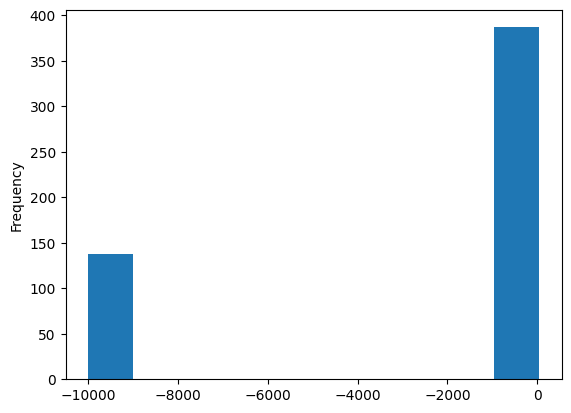

In [6]:
#Graficamos las variables en busca de datos atipicos
import matplotlib.pyplot as plt

df['value'].plot(kind='hist')

<Axes: xlabel='coordinates.longitude'>

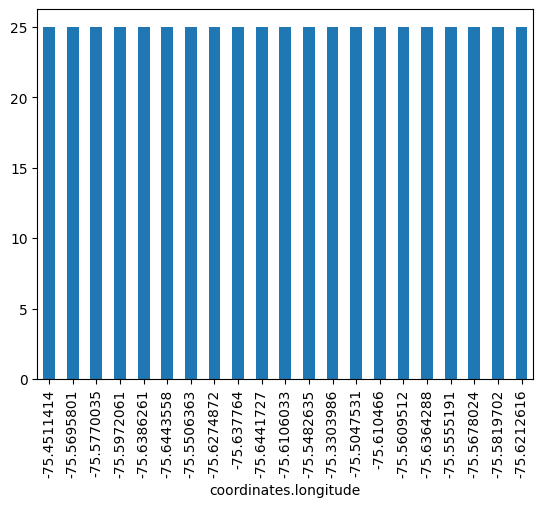

In [7]:
df['coordinates.longitude'].value_counts().plot(kind='bar')

<Axes: xlabel='coordinates.latitude'>

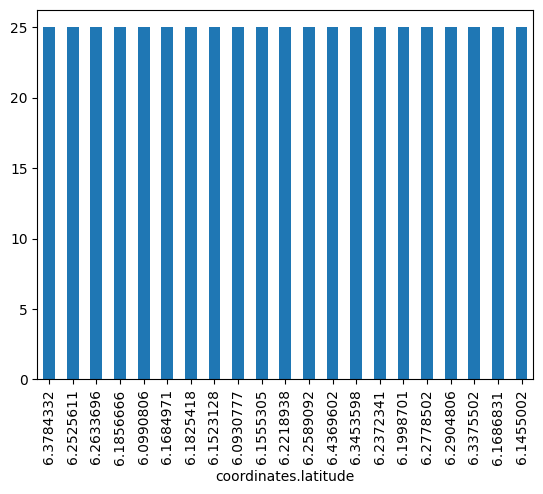

In [8]:
df['coordinates.latitude'].value_counts().plot(kind='bar')

In [9]:
#Se eligio eliminar los valores de PM2.5 que no esten entre 0 y 100
df = df[(df['value'] >= 0) & (df['value'] <= 100)]
df.describe()

,value,coordinates.latitude,coordinates.longitude
count,387.000000,387.000000,387.000000
mean,19.416828,6.234597,-75.575474
std,8.413126,0.086074,0.075423
min,1.142590,6.093078,-75.644356
25%,13.175900,6.168497,-75.621262
50%,19.459900,6.221894,-75.581970
75%,24.527800,6.277850,-75.555519
max,41.917500,6.436960,-75.330399


In [10]:
#Se le calcula el AQI a cada uno de los valores
def calcular_aqi(value):

    valores_aqi = [
        [0,50,0,12], #Buena
        [51,100,12.1,35.4], #Moderada
        [101,150,35.5,55.4], #Poco saludable para algunos grupos
        [151,200,55.5,150.4], #Poco saludable
        [201,300,150.5,250.4], #Muy poco saludable
        [301,500,250.5,500.4] #Peligro
    ]

    aqi = 0
    for i in range(len(valores_aqi)):
        if value >= valores_aqi[i][2] and value <= valores_aqi[i][3]:
            aqi = (valores_aqi[i][1] - valores_aqi[i][0])/(valores_aqi[i][3] - valores_aqi[i][2])*(value - valores_aqi[i][2]) + valores_aqi[i][0]
            break
    aqi = round(aqi,0)
    return aqi

df['AQI'] = df['value'].apply(calcular_aqi)
df.head()

,value,date.utc,date.local,coordinates.latitude,coordinates.longitude,AQI
25,31.0,2024-09-04T13:00:00.000Z,2024-09-04T08:00:00.000-05:00,6.252561,-75.56958,91.0
26,30.0,2024-09-04T14:00:00.000Z,2024-09-04T09:00:00.000-05:00,6.252561,-75.56958,89.0
27,28.0,2024-09-04T15:00:00.000Z,2024-09-04T10:00:00.000-05:00,6.252561,-75.56958,84.0
28,29.0,2024-09-04T16:00:00.000Z,2024-09-04T11:00:00.000-05:00,6.252561,-75.56958,87.0
29,32.0,2024-09-04T17:00:00.000Z,2024-09-04T12:00:00.000-05:00,6.252561,-75.56958,93.0


## **Segundo Punto: Interpolación de los datos**


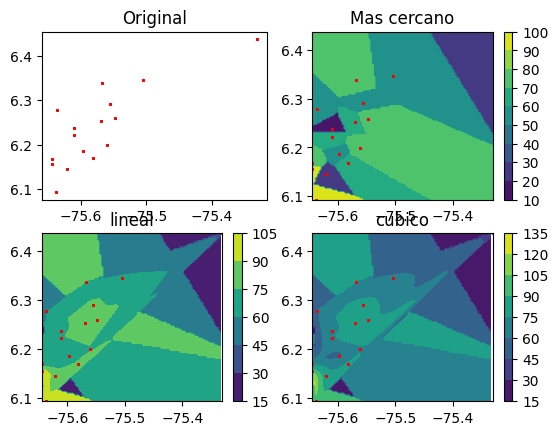

[[-75.6443558  -75.64118452 -75.63801323 ... -75.33674117 -75.33356988
  -75.3303986 ]
 [-75.6443558  -75.64118452 -75.63801323 ... -75.33674117 -75.33356988
  -75.3303986 ]
 [-75.6443558  -75.64118452 -75.63801323 ... -75.33674117 -75.33356988
  -75.3303986 ]
 ...
 [-75.6443558  -75.64118452 -75.63801323 ... -75.33674117 -75.33356988
  -75.3303986 ]
 [-75.6443558  -75.64118452 -75.63801323 ... -75.33674117 -75.33356988
  -75.3303986 ]
 [-75.6443558  -75.64118452 -75.63801323 ... -75.33674117 -75.33356988
  -75.3303986 ]]


In [11]:
import numpy as np

longitudes = df['coordinates.longitude'].tolist()
latitudes = df['coordinates.latitude'].tolist()
m = df['AQI'].tolist()

#Se sacan los puntos de los sensores mas bajos y altos para la grilla
min_y = df['coordinates.latitude'].min()
max_y = df['coordinates.latitude'].max()
min_x = df['coordinates.longitude'].min()
max_x = df['coordinates.longitude'].max()

#grid_x, grid_y = np.mgrid[min_x:max_x:100j, min_y:max_y:100j]

grid_x, grid_y = np.meshgrid(np.linspace(min_x,max_x,100), np.linspace(min_y,max_y,100))
#construyo la interpolacion
from scipy.interpolate import griddata

grid_z0 = griddata((latitudes, longitudes), m, (grid_y, grid_x), method='nearest')
grid_z1 = griddata((latitudes, longitudes), m, (grid_y, grid_x), method='linear')
grid_z2 = griddata((latitudes, longitudes), m, (grid_y, grid_x), method='cubic')

#llenar los datos NaN con el valor de nearest para completar los datos en z1 y z2
rows = grid_z0.shape[0]
cols = grid_z0.shape[1]

for x in range(0, cols - 1):
    for y in range(0, rows -1):
        if np.isnan(grid_z1[x,y]):
            grid_z1[x,y]=grid_z0[x,y]
        if np.isnan(grid_z2[x,y]):
            grid_z2[x,y]=grid_z0[x,y]
#Graficar los estados
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(longitudes, latitudes, 'r.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.contourf(grid_x, grid_y, grid_z0)
plt.plot(longitudes, latitudes, 'r.', ms=1)
plt.colorbar()
plt.title('Mas cercano')
plt.subplot(223)
plt.contourf(grid_x, grid_y, grid_z1)
plt.plot(longitudes, latitudes, 'r.', ms=1)
plt.colorbar()

plt.title('lineal')
plt.subplot(224)
plt.contourf(grid_x, grid_y, grid_z2)
plt.plot(longitudes, latitudes, 'r.', ms=1)
plt.colorbar()

plt.title('cubico')

plt.show()
print(grid_x)

##**Tercer Punto: Creación de la visualización**

In [12]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 26.0 MB/s eta 0:00:00


In [13]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
added 22 packages in 3s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙

In [14]:
import dash
from dash import html, dcc
import plotly.graph_objects as go

#cubic, linear, nearest

# Rellenar NaN con nearest
grid_z2[np.isnan(grid_z2)] = grid_z0[np.isnan(grid_z2)]

# ======= CONVERTIR GRILLA A PUNTOS =======
lat_interp = grid_y.flatten()
lon_interp = grid_x.flatten()
z_interp = grid_z2.flatten()

peligro = 80

hover_text = []
for valor in z_interp:
    if valor < peligro:
        hover_text.append("Es seguro salir")
    else:
        hover_text.append("Cuidado al salir")

# ======= DASH + MAPA =========
app = dash.Dash()

fig = go.Figure(go.Densitymapbox(
    lat=lat_interp,
    lon=lon_interp,
    z=z_interp,
    customdata=np.array(hover_text),
    radius=20,
    opacity=0.8,
    zmin=0,
    zmax=500,
    colorscale=[
        [0.0, "green"],
        [0.06, "yellow"],
        [0.12, "orange"],
        [0.20, "red"],
        [1.0, 'black']
    ],
    colorbar=dict(
        title="Calidad del Aire (AQI)",
        tickvals=[0, 50, 100, 250],
        ticktext=["Buena (0)", "Moderada (50)", "Peligro (80)", "Mala (100)", "Crítica (250)"]
    ),
    hovertemplate=(
        "Lat: %{lat}<br>" +
        "Lon: %{lon}<br>" +
        "Valor: %{z:.2f}<br>" +
        "%{customdata}<extra></extra>"
    )
))

fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_center={"lat": np.mean(latitudes), "lon": np.mean(longitudes)},
    mapbox_zoom=11,
    margin={"r":0,"t":0,"l":0,"b":0}
)



In [15]:
#Se definen los valores de las recomendaciones

def recomendacion():
  peligro = 80
  suma = 0
  for i in m:
    suma += i

  promedio = round(suma/len(m),0)

  if promedio > peligro:
    title = 'Emergencia climatica!'
    text = 'Emergencia climatica! Los Enfermos, \nEmbarazadas y Niños deberian abstenerse de salir'
    image = 'AlertaRoja.png'
  else:
    title = 'No hay alerta'
    text = 'Es seguro salir'
    image = 'AlertaVerde.png'

  return promedio, title, text, image

promedio, title, text, image = recomendacion()

print(promedio)

65.0


In [16]:
#Se construye el layout del dashboard
app.layout = html.Div([
    html.H1("Dashboard de Contaminacion del aire",
            style={
                "textAlign": "center",
                "fontWeight": "bold",
                "fontSize": "36px",
                "marginBottom": "20px"
            }),

    # Contenedor principal (dos columnas)
    html.Div([
        # Columna izquierda
        html.Div([
            html.H2(title, style={"textAlign": "center", "fontWeight": "bold"}),
            html.Img(
                src='assets/' + image,  # aquí va tu imagen dinámica
                style={
                    "width": "225px",
                    "height": "150px",
                    "backgroundColor": "gray",
                    "borderRadius": "8px",
                    "display": "block",
                    "margin": "0 auto"
                }
            ),
            html.H3(str(promedio) + "/500", style={"textAlign": "center", "fontWeight": "bold"}),
            html.P(text,
                style={"textAlign": "center", "whiteSpace": "pre-line"})
        ], style={
            "flex": "1",
            "backgroundColor": "#f9f9f9",
            "padding": "20px",
            "borderRadius": "10px",
            "marginRight": "10px"
        }),

        # Columna derecha (mapa)
        html.Div([
            html.H2("Contaminación por area", style={"textAlign": "center", "fontWeight": "bold"}),
            dcc.Graph(figure=fig, style={"height": "400px"})
        ], style={
            "flex": "2",
            "backgroundColor": "#fff",
            "padding": "10px",
            "borderRadius": "10px"
        })
    ], style={
        "display": "flex",
        "justifyContent": "space-between",
        "alignItems": "stretch",
        "padding": "0 40px"
    })
], style={"fontFamily": "Arial, sans-serif"})

In [17]:
if __name__ == "__main__":
    app.run(debug=True, use_reloader=False, host='127.0.0.1', port=80)

<IPython.core.display.Javascript object>

In [ ]:
import urllib.request

print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

!npx localtunnel --port 80

Password/Enpoint IP for localtunnel is: 35.221.147.35
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇your url is: https://bitter-grapes-throw.loca.lt
